# Import libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import string
from nltk.corpus import stopwords

%matplotlib inline 
sns.set_style('darkgrid')

# Loading Data

In [26]:
reviews = [line.rstrip() for line in open('IMDB Dataset.csv')]
print(len(reviews))

50001


In [8]:
# Previewing the data
for review_no, review in enumerate(reviews[:10]):
    print(review_no, review)
    print('\n')

0 review,sentiment


1 "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of th

In [33]:
# Importing the data
df = pd.read_csv('IMDB Dataset.csv')

In [34]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [36]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [37]:
# Checking for missing values 
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [38]:
df[df['review'].str.isspace()]

,review,sentiment


In [39]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [42]:
# Removing special characters
cleaner = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def cleanhtml(raw_html):
    clean_text = re.sub(cleaner, '',raw_html)
    return clean_text

In [43]:
cleanhtml(df['review'][1])

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [44]:
# Applying cleanhtml to 'review' values in data
df['review'] = df['review'].apply(lambda x: cleanhtml(x))

In [46]:
df['review'][1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

# Data Visualizations

In [47]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

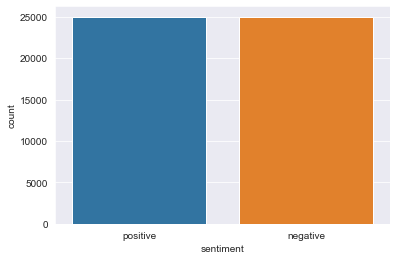

In [49]:
sns.countplot(x='sentiment', data=df)

In [53]:
# Checking if length has any correlation with length of review
df['length'] = df['review'].apply(len)
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1725
1,A wonderful little production. The filming tec...,positive,962
2,I thought this was a wonderful way to spend ti...,positive,902
3,Basically there's a family where a little boy ...,negative,712
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1269


<AxesSubplot:ylabel='Frequency'>

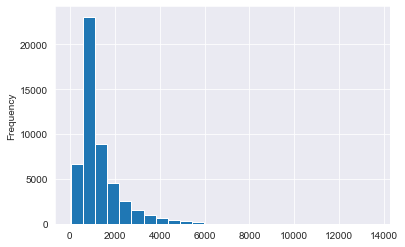

In [57]:
# Plotting length of reviews
df['length'].plot(bins=25, kind='hist') 

In [58]:
df.length.describe()

count    50000.000000
mean      1285.172500
std        971.138333
min         32.000000
25%        689.000000
50%        953.000000
75%       1559.000000
max      13584.000000
Name: length, dtype: float64

In [59]:
# Inpsecting longest review
df[df['length'] == 13584]['review'].iloc[0]

'Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, bu

In [60]:
# Inspecting shortest review 
df[df['length'] == 32]['review'].iloc[0]

'Read the book, forget the movie!'

array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

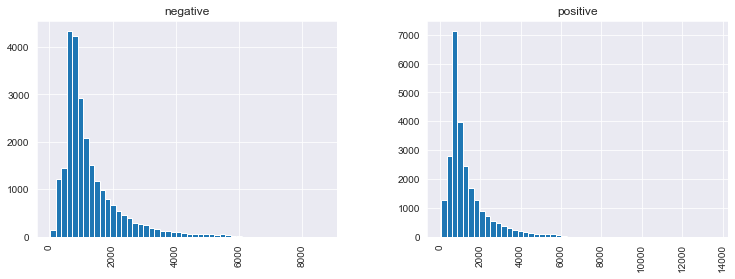

In [62]:
# Comparing positive reviews to negative reviews 
df.hist(column='length', by='sentiment', bins=50,figsize=(12,4))

# Text Pre-processing

In [64]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string
    nopunc = ''.join(nopunc)
    
    # remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [65]:
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1725
1,A wonderful little production. The filming tec...,positive,962
2,I thought this was a wonderful way to spend ti...,positive,902
3,Basically there's a family where a little boy ...,negative,712
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1269


In [66]:
df['review'].head(5).apply(text_process)

0    [One, reviewers, mentioned, watching, 1, Oz, e...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [Basically, theres, family, little, boy, Jake,...
4    [Petter, Matteis, Love, Time, Money, visually,...
Name: review, dtype: object

In [67]:
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1725
1,A wonderful little production. The filming tec...,positive,962
2,I thought this was a wonderful way to spend ti...,positive,902
3,Basically there's a family where a little boy ...,negative,712
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1269


# Vectorization

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['review'])

In [70]:
print(len(bow_transformer.vocabulary_))

257047


In [72]:
review4 = df['review'][3]
print(review4)

Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.


In [73]:
bow4 = bow_transformer.transform([review4])
print(bow4)
print(bow4.shape)

  (0, 95)	1
  (0, 10591)	1
  (0, 11858)	1
  (0, 25773)	1
  (0, 45979)	4
  (0, 66625)	1
  (0, 71655)	1
  (0, 103810)	1
  (0, 108305)	1
  (0, 112621)	1
  (0, 120657)	2
  (0, 129282)	1
  (0, 130543)	1
  (0, 131394)	1
  (0, 133950)	1
  (0, 135448)	3
  (0, 142827)	1
  (0, 144535)	1
  (0, 146500)	1
  (0, 146630)	2
  (0, 148131)	1
  (0, 154529)	1
  (0, 164542)	1
  (0, 167338)	1
  (0, 171817)	1
  :	:
  (0, 185301)	3
  (0, 187272)	1
  (0, 194093)	1
  (0, 197321)	2
  (0, 201220)	1
  (0, 208718)	1
  (0, 214458)	1
  (0, 218015)	1
  (0, 221409)	1
  (0, 222433)	1
  (0, 223962)	1
  (0, 224753)	1
  (0, 227290)	1
  (0, 231378)	1
  (0, 236694)	2
  (0, 237195)	1
  (0, 238033)	2
  (0, 238825)	1
  (0, 240523)	1
  (0, 249884)	1
  (0, 249916)	1
  (0, 250906)	1
  (0, 256143)	1
  (0, 256474)	1
  (0, 256477)	1
(1, 257047)


In [74]:
print(bow_transformer.get_feature_names()[45979])
print(bow_transformer.get_feature_names()[185301])

Jake
movie


In [76]:
reviews_bow = bow_transformer.transform(df['review'])

In [77]:
print('Shape of Sparse Matrix: ', reviews_bow.shape)
print('Amount of Non-Zero occurences: ', reviews_bow.nnz)

Shape of Sparse Matrix:  (50000, 257047)
Amount of Non-Zero occurences:  5045782


In [79]:
sparsity = (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 256477)	0.2034330300206492
  (0, 256474)	0.1056697159123083
  (0, 256143)	0.0700111925202802
  (0, 250906)	0.044711511121293714
  (0, 249916)	0.06479012334742162
  (0, 249884)	0.10083934925711063
  (0, 240523)	0.07466010910472112
  (0, 238825)	0.1511022620014895
  (0, 238033)	0.17301178842627463
  (0, 237195)	0.09321559318769276
  (0, 236694)	0.13856583126002098
  (0, 231378)	0.09290977049992742
  (0, 227290)	0.2034330300206492
  (0, 224753)	0.10730813099328028
  (0, 223962)	0.13741316786427607
  (0, 222433)	0.08272767247237697
  (0, 221409)	0.08187882101892968
  (0, 218015)	0.039589948560909805
  (0, 214458)	0.12056169342776213
  (0, 208718)	0.05450732676522991
  (0, 201220)	0.07168950867669092
  (0, 197321)	0.1732567930486903
  (0, 194093)	0.10528206743611279
  (0, 187272)	0.0597927846014831
  (0, 185301)	0.08338822214087956
  :	:
  (0, 171817)	0.07896082172735888
  (0, 167338)	0.07071812938084655
  (0, 164542)	0.11194387038076864
  (0, 154529)	0.055454216485069784
  (0, 148131

In [83]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

6.643648551636456
7.245087305706903


In [85]:
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)

(50000, 257047)


# Training a model

In [87]:
from sklearn.naive_bayes import MultinomialNB
negative_detect_model = MultinomialNB().fit(reviews_tfidf, df['sentiment'])

In [89]:
print('predicted:', negative_detect_model.predict(tfidf4)[0])
print('expected:', df.sentiment[3])

predicted: negative
expected: negative


# Model Evaluation

In [90]:
all_predictions = negative_detect_model.predict(reviews_tfidf)
print(all_predictions)

['positive' 'positive' 'positive' ... 'negative' 'negative' 'negative']


In [91]:
from sklearn.metrics import classification_report
print (classification_report(df['sentiment'], all_predictions))

              precision    recall  f1-score   support

    negative       0.92      0.93      0.92     25000
    positive       0.93      0.91      0.92     25000

    accuracy                           0.92     50000
   macro avg       0.92      0.92      0.92     50000
weighted avg       0.92      0.92      0.92     50000



# Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['review'], df['sentiment'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

40000 10000 50000


In [93]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Strings to token integer counts
    ('tfidf', TfidfTransformer()),  # Integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # Train on TF-IDF vectors w/ Naive Bayes classifier
])

In [94]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fec3623c820>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [95]:
predictions = pipeline.predict(msg_test)

In [96]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      5057
    positive       0.87      0.88      0.87      4943

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

